<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/World_Health_Organization_Logo.svg/1280px-World_Health_Organization_Logo.svg.png" alt="image info" />

# Exploratory Data Analysis

## 0. Imports & Loading Data

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Life Expectancy Data.csv')

# 1.0 - Basic Data Inspection 

In [ ]:
pd.set_option('display.max_columns', None) # set no limit on max columns to ensure we can review the entire table
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [78]:
df.shape

(2864, 21)

### 1.1 - Inspect for duplicate rows

In [ ]:
dupes_all = ( # create df to contain deuplicated values
    df[df.duplicated(keep=False)] # drop rows which are not duplicated
      .sort_values(list(df.columns))
)
dupes_all

# returns no fully duplicate rows


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy


### 1.2 - Inspect columns, Dtypes, and Nulls

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [81]:
print('Number of Unique Countries -', df.Country.nunique()) # return number of unique countries
print('Number of Unique Regions -', df.Region.nunique()) # return number of unique regions

Number of Unique Countries - 179
Number of Unique Regions - 9


**Country** and **Region** both identified as string dtypes so must be handled appropriately. 9 regions struck us as a reasonable number to One Hot Encode, 179 countries may be slighyly clumsy/cumbersome to handle as OHE. No unexpected non-numeric values.

**No null values.** Next step is to investigate and potentially erroneous zeroes. 

### 1.3 - Inspect Zeroes

In [82]:
# Inspect zeros in key numeric columns
num_cols = ['Year','Infant_deaths','Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio','Diphtheria', 'Incidents_HIV',
           'GDP_per_capita','Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years','Schooling', 'Economy_status_Developed', 'Economy_status_Developing', 'Life_expectancy'] # define numeric columns for inspection
zero_counts = (df[num_cols] == 0).sum().to_frame('zeros') # define zero_counts variable to count the number of zero values in each column
zero_counts

,zeros
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,38
Hepatitis_B,0
Measles,0
BMI,0
Polio,0
Diphtheria,0


Expected zeroes returned in the already one-hot encoded 'Economy_status_Developed' and 'Economy_status_Developing' columns.

Some zeroes returned in the alcohol_consumption column - worth taking a look at. 

In [83]:
df[df['Alcohol_consumption']==0][['Country', 'Year', 'Alcohol_consumption']].sort_values(['Country','Year']) # Boolean mask returns Country,Year, and alcohol consumption for rows where alcohol consumption = 0

,Country,Year,Alcohol_consumption
1066,Afghanistan,2015,0.0
2390,Bangladesh,2010,0.0
327,Bangladesh,2011,0.0
1925,Bangladesh,2012,0.0
1546,Bangladesh,2013,0.0
1082,Kuwait,2010,0.0
69,Kuwait,2011,0.0
1583,Kuwait,2012,0.0
2041,Kuwait,2013,0.0
838,Kuwait,2014,0.0


These are countries we would reasonably expect to have low to zero alcohol consumption due to their being returned from nations where alcohol use is restricted or uncommon for cultural or religious reasons. The only country to report 0 average alcohol consumption over the entire period was Somalia. 

### 1.4 - Preliminary Inspection of Numeric Distributions

In [84]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


# Inspection Summary 

We observed no nulls and no duplicated rows. Zeroes occur in two places (three columns): the developed and developing nation binary columns and a small number of records in the alcohol consumption column. These alcohol consumption zeroes are plausible as they occured in countries where its consumption is restricted or uncommon for cultural or religious reasons, so we retain them as valid values.

# 2.0 - Investigate Correlations

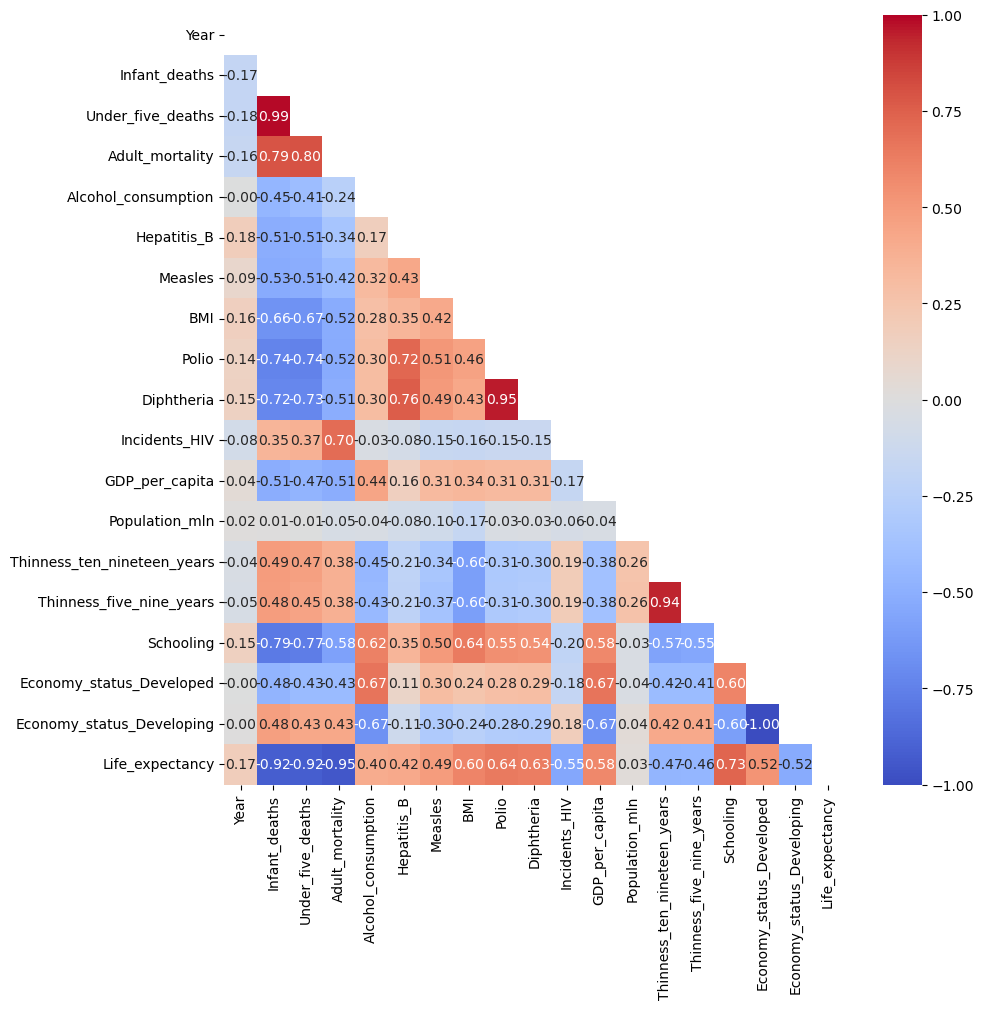

In [ ]:
corr = df.corr(numeric_only=True) # create correlation df for correlation analysis and select for numeric columns only
mask = np.triu(np.ones_like(corr, dtype=bool))  # Build a mask for the upper triangle (True = hide), to avoid duplicate info

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,                 # correlation matrix
    annot=True,           # show the numbers in each cell
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # colour map assign red=positive, blue=negative
    vmin=-1, vmax=1,      # fix the scale to full [-1, 1] range
    mask=mask             # hide the upper triangle
)
plt.show()

## 2.1 - Correlation Interpretation


**Life Expectancy** is highly correlated with infant deaths, under 5 deaths, and adult mortality. Schooling, BMI, and various features measuring diseases also appear to be quite relevant. 

**Diphtheria–Polio–HepB:** Very high correalation (particularly between Diptheira and Polio), plausibly due to combined vaccines being the causal driver behind all three. Potential for collinearity. 

**Thinness_10–19 vs Thinness_5–9** and **Infant_deaths vs Under_five_deaths:** are the same construct across adjacent age bands, near-duplicate behaviour.

### 2.1.1 - Correlations in Absolute Values

In [86]:
top_features = corr['Life_expectancy'].abs().drop('Life_expectancy').sort_values(ascending=False) # create top features matrix sorted by existing correlation variable. Ensure values are absolute so that we are only assessing the strength of the correlation

print("Highest correlation with Life_expectancy: ")
print(top_features)

Highest correlation with Life_expectancy: 
Adult_mortality                0.945360
Under_five_deaths              0.920419
Infant_deaths                  0.920032
Schooling                      0.732484
Polio                          0.641217
Diphtheria                     0.627541
BMI                            0.598423
GDP_per_capita                 0.583090
Incidents_HIV                  0.553027
Economy_status_Developing      0.523791
Economy_status_Developed       0.523791
Measles                        0.490019
Thinness_ten_nineteen_years    0.467824
Thinness_five_nine_years       0.458166
Hepatitis_B                    0.417804
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Name: Life_expectancy, dtype: float64


## 2.2 - Plotting Distributions of Correlated Variables

**Polio, Diphtheria,** and **Hepatitis_B** are all immunisation rates for 1-year-olds. They are strongly correlated and show very similar, high-coverage distributions with low-end outliers. Measles is excluded here because it is measured as cases per 1,000, so it is not comparable on scale or mechanism. 

**Thinness_five_nine_years** and **Thinness_ten_nineteen_years** are both percentages of their respective populations. They are highly correlated (r = 0.90) and their distributions are near-identical, with a few high-end outliers. 

**Infant and Under 5 Deaths per 1000 of population** (per 1,000) are broadly aligned but not identical. Under-five deaths has a higher median, a wider IQR and more high-end outliers. 

Having observed the existence of a number of outliers we decided to later on investigate the use of a **Robust Scaler** in our Feature Engineering to control for this.


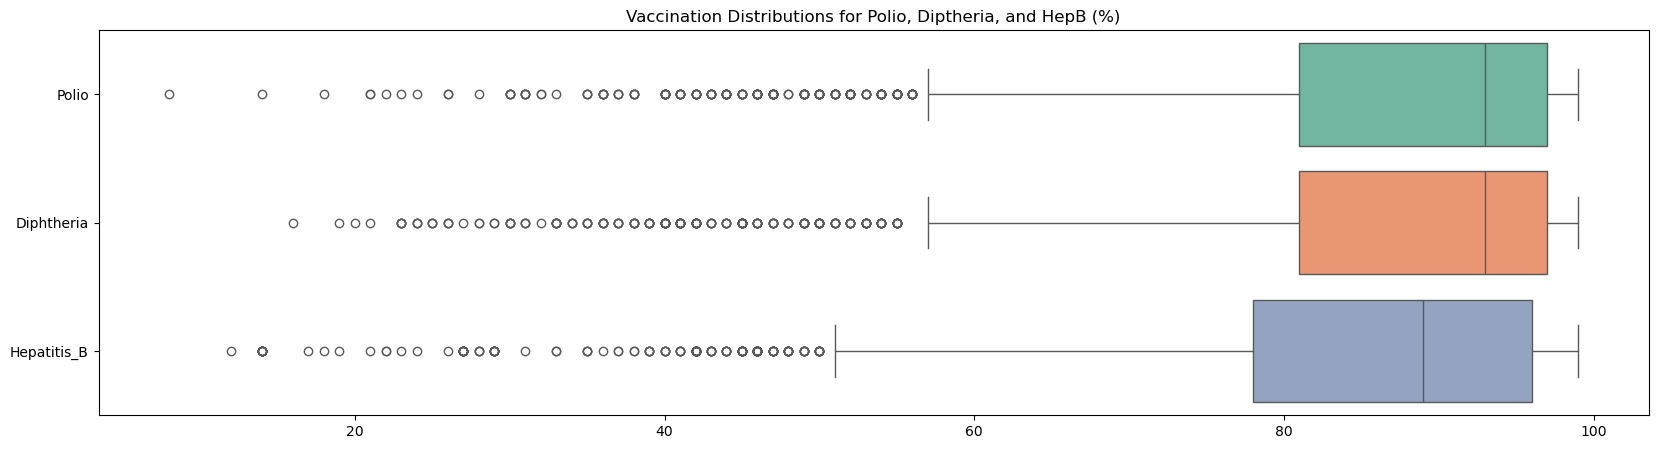

In [87]:
plt.figure(figsize = (20, 5))                                  # plot figure and define its size
sns.boxplot(data = df[['Polio', 'Diphtheria', 'Hepatitis_B']], # select columns to be visualised in boxplots - here we assess highly correlated diseases
            orient = 'h',                                      # orient horizontally
           palette='Set2')   # select colour palette

plt.title('Vaccination Distributions for Polio, Diptheria, and HepB (%)')
plt.show()

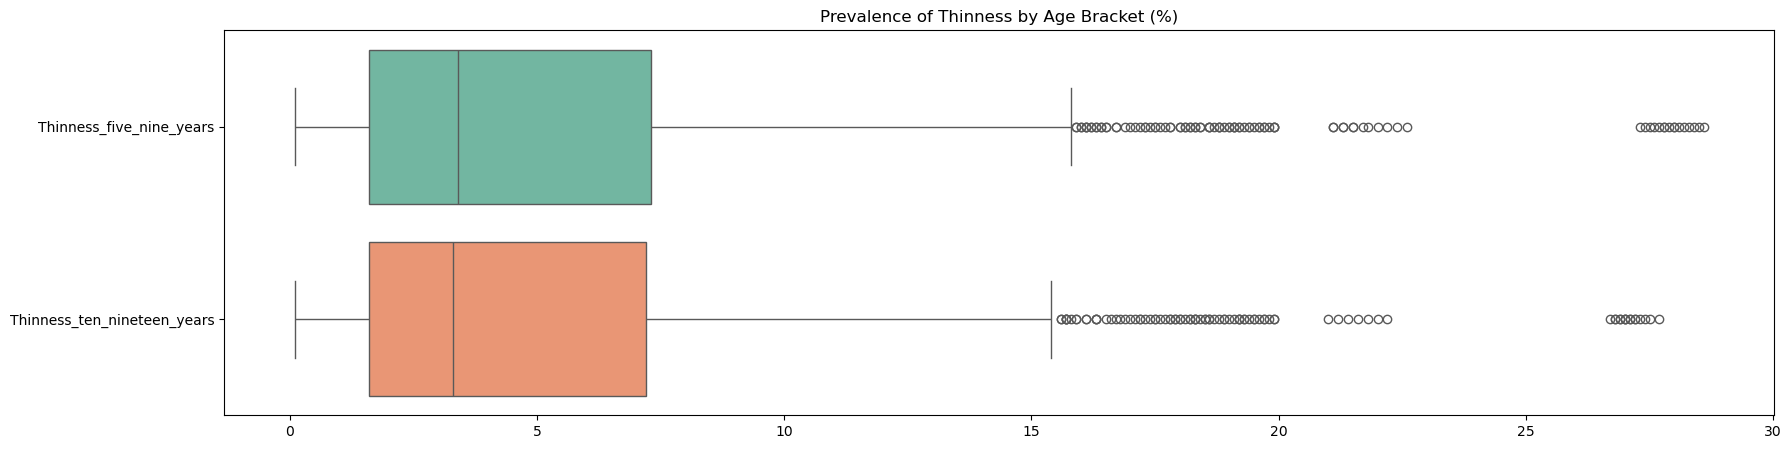

In [88]:
plt.figure(figsize = (20, 5))                                                       # plot figure and define its size
sns.boxplot(data = df[['Thinness_five_nine_years', 'Thinness_ten_nineteen_years']], # select columns to be visualised in boxplots - here we investigate two highly correlated features assessing thinness at different ages
            orient = 'h',                                                           # orient horizontally
           palette='Set2')                                                          # select colour palette

plt.title('Prevalence of Thinness by Age Bracket (%)')
plt.show()

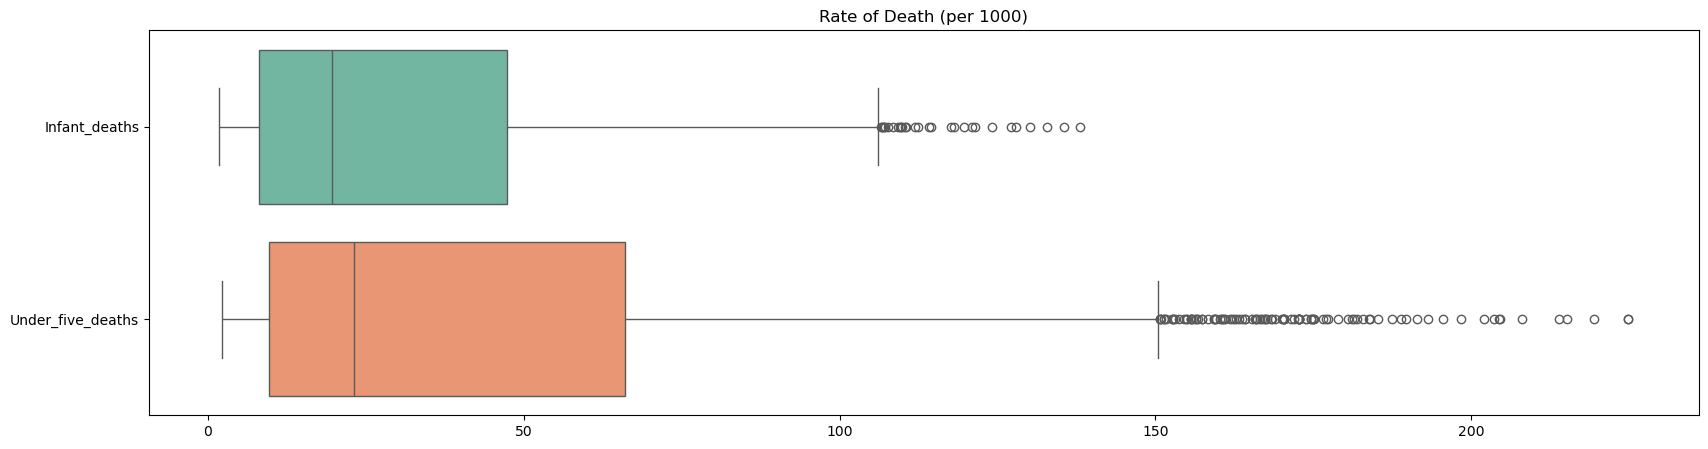

In [89]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df[['Infant_deaths', 'Under_five_deaths']], # select columns to be visualised in boxplots - infant vs unde five deaths per 1000
            orient = 'h',                                      # orient horizontally
           palette='Set2')                                     # select colour palette

plt.title('Rate of Death (per 1000)')
plt.show()

# 3.0 - Target Analysis

**Target Distribution** Life Expectancy is left-skewed concentration between 70-75 years. 


**Target Outliers** A small number of observations show very low Life_expectancy (< 45 years), concentrated in the early-2000s and in a handful of countries (Central African Republic, Eswatini, Lesotho, Sierra Leone, Zambia, Zimbabwe). These values likely reflect period-specific shocks (conflict/epidemic). We retain them as valid observations and proceed without special handling.

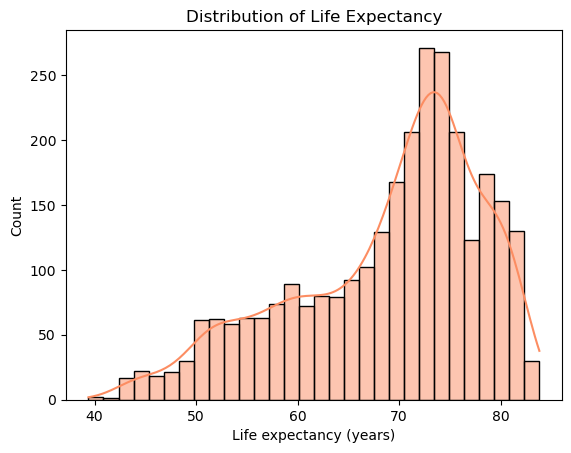

In [90]:
sns.histplot(data=df,                            # select df for histogram
             x='Life_expectancy',                # select y (life expectancy)
             bins=30,                            # define number of bins
             kde=True,
             color=sns.color_palette('Set2')[1]) # select colour palette

plt.xlabel('Life expectancy (years)')            # assign x axis title
plt.title('Distribution of Life Expectancy')     # assign graph title
plt.show()

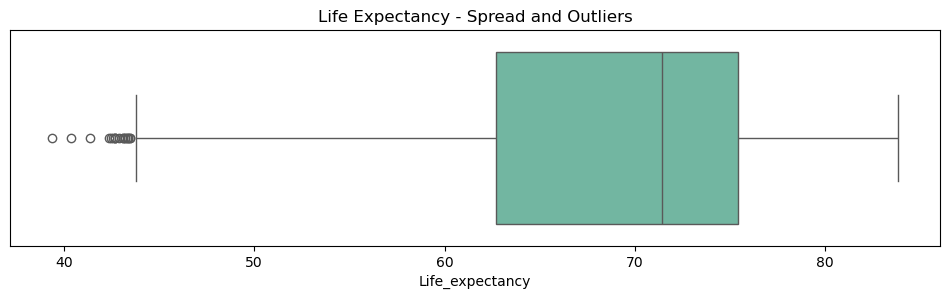

In [91]:
plt.figure(figsize=(12, 2.8))
sns.boxplot(x='Life_expectancy', data=df, color=sns.color_palette('Set2')[0]) # select life expectancy column for boxplot visualisation, select df, select colour palette
plt.title('Life Expectancy - Spread and Outliers')                          # define graph title
plt.yticks([])
plt.show()

### 3.1 - Investigating Life Expectancy Outliers

In [92]:
df.loc[df['Life_expectancy'] < 45, ['Country', 'Year', 'Life_expectancy']].sort_values(['Country', 'Year']) # boolean mask to return countries, years, LE where LE was <45, sorted by Country then Year

,Country,Year,Life_expectancy
2175,Central African Republic,2000,44.2
376,Central African Republic,2001,44.1
155,Central African Republic,2002,44.1
1802,Central African Republic,2003,44.2
657,Central African Republic,2004,44.4
869,Central African Republic,2005,44.7
1236,Eswatini,2002,44.4
1686,Eswatini,2003,43.4
1139,Eswatini,2004,42.7
1275,Eswatini,2005,42.5


# 4.0 - Assessing Linearity of Relationships

In order to determine which Machine Learning technique is most appropriate for our analysis we investigated the shape of our relationships. 

N.B. we did inspect a pairplot of all relationships in the dataset. However, to aid readability we have chosen to only present choice examples which influenced our feature engineering and model selection. 

Code to Return pairplots of all relationships:

`sns.pairplot(df),`
`plt.show()`

## 4.1 - Non-linear Relationship between Life Expectancy and GDP_per_capita / BMI

Here we can observe a **strongly logarithmic relationship between Life_expectancy and GDP_per_capita** as well as its more subtlely logarithmic relationship with **BMI**. 

Having taken the log of both GDP_per_capita and BMI we can visualise improvements to the linearity of both features relationship with Life_expectancy. 

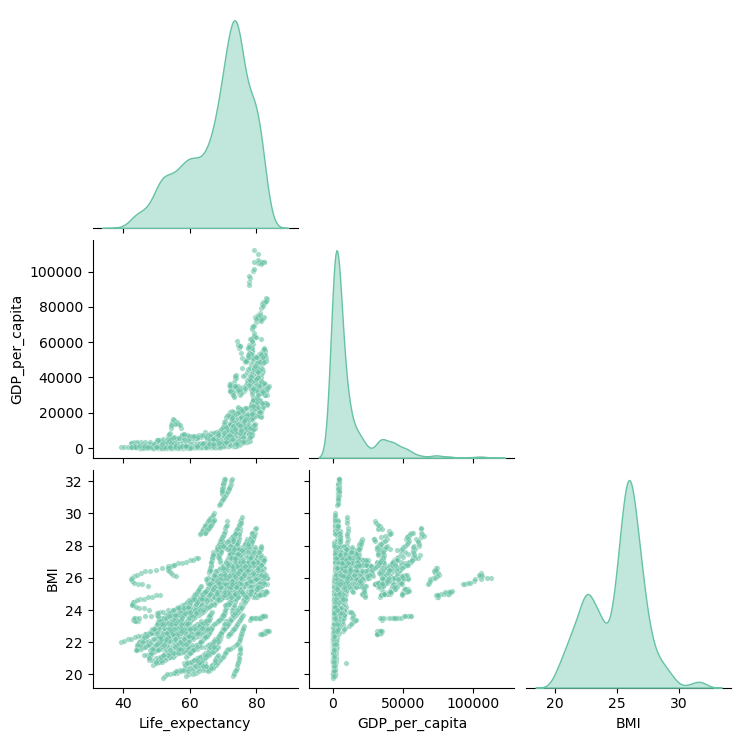

In [93]:

cols = ['Life_expectancy','GDP_per_capita','BMI']  # define columns to be visualised in pairplot
c = sns.color_palette('Set2')[0]                   # define colour palette

sns.pairplot(
    df[cols],                                      # data subset
    corner=True,                                   # lower triangle only
    diag_kind='kde',                               # KDE on the diagonal
    plot_kws={'alpha': 0.6, 's': 15, 'color': c},  # scatter style
    diag_kws={'fill': True, 'alpha': 0.4, 'color': c}  # KDE style
)

plt.show()


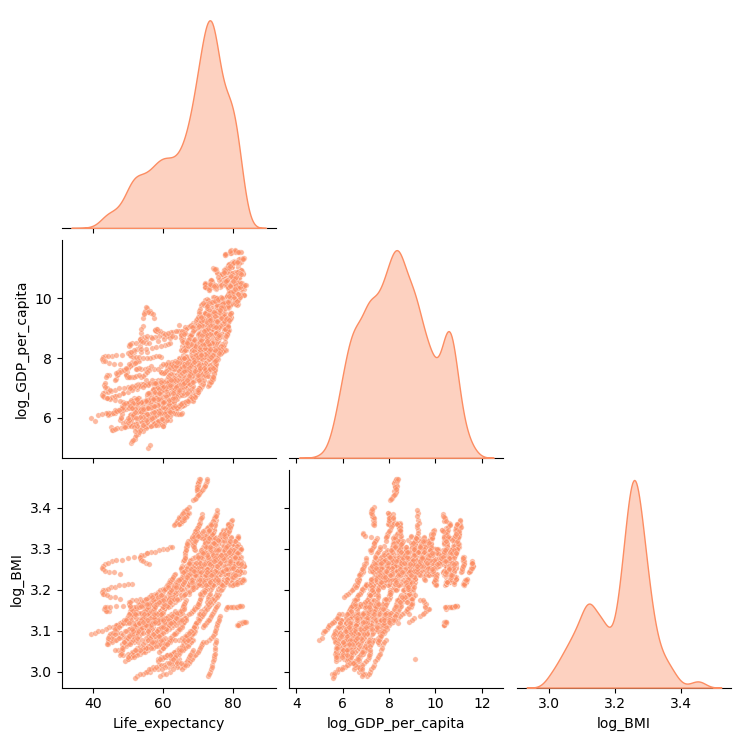

In [94]:
# Take the log of population and gdp_per_capita
df['log_GDP_per_capita'] = np.log(df['GDP_per_capita'])   # log columns to make relationship with LE more linear
df['log_BMI'] = np.log(df['BMI'])

cols = ['Life_expectancy','log_GDP_per_capita','log_BMI'] # define columns to be visualised in pairplot
c = sns.color_palette('Set2')[1]                          # define colour palette

sns.pairplot(
    df[cols],                                              # data subset
    corner=True,                                           # lower triangle only
    diag_kind='kde',                                       # KDE on diagonals
    plot_kws={'alpha': 0.6, 's': 15, 'color': c},          # scatter style
    diag_kws={'fill': True, 'alpha': 0.4, 'color': c}      # KDE style
)
plt.show()

## 4.2 - Linear Relationship Between Life Expectancy and Various Potential Features

### 4.2.1 - Adult Mortality and Schooling

Here we observe a strong negative linear relationship between Life Expectancy and Adult Mortality as well as with Schooling. 

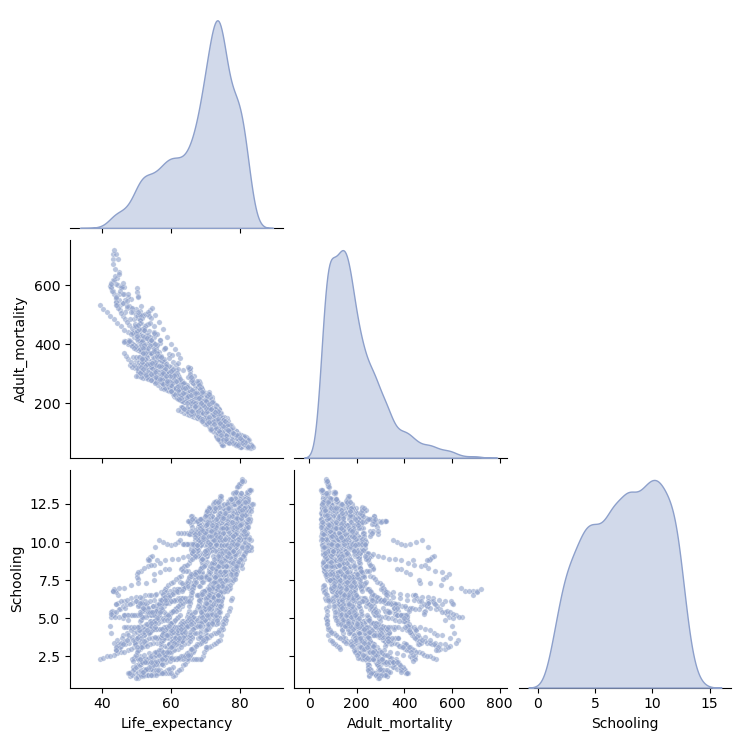

In [95]:
cols = ['Life_expectancy','Adult_mortality','Schooling'] # define columns for graphs
c = sns.color_palette('Set2')[2]                         # select colour scheme

sns.pairplot(
    df[cols],                                              # data slice
    corner=True,                                           # lower triangle only
    diag_kind='kde',                                       # KDE on diagonals
    plot_kws={'alpha': 0.6, 's': 15, 'color': c},          # scatter style
    diag_kws={'fill': True, 'alpha': 0.4, 'color': c}      # KDE style
)
plt.show()

### 4.2.2 - Infant Deaths and Under Five Deaths

We can observe here the negative linear relationships between Life_expectancy and both of Infant_deaths and Under_five_deaths. However, under five deaths appears to tail off and plateau as life expectancy increases inidcating potential for a non-linear relationship. 

We are also able to visualise the collinearity between Infant_deaths and Under_five deaths which we identified in our correlation heatmap. 

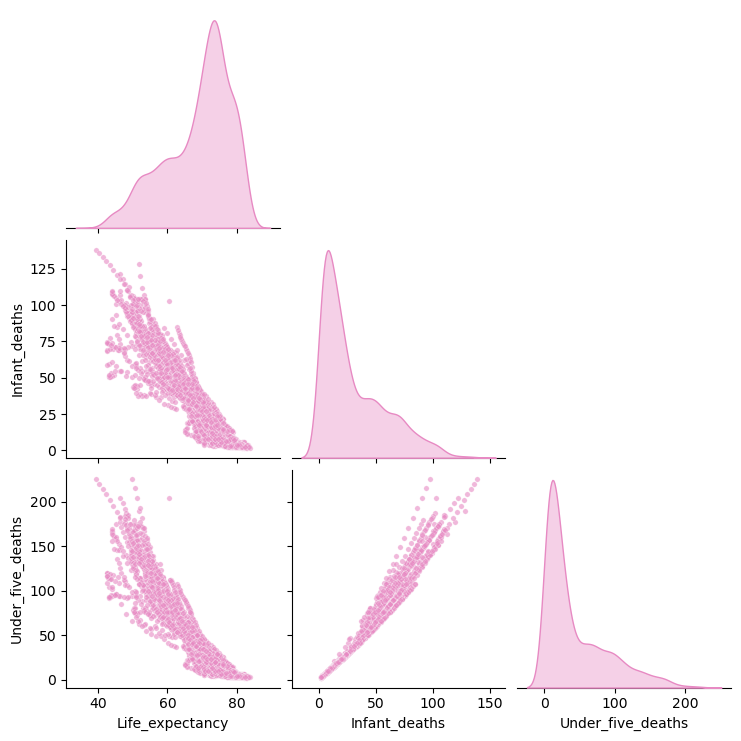

In [96]:
cols = ['Life_expectancy','Infant_deaths','Under_five_deaths'] # select columns for graph
c = sns.color_palette('Set2')[3]                               # define colour palette

sns.pairplot(
    df[cols],                                                    # data slice
    corner=True,                                                 # lower triangle only
    diag_kind='kde',                                             # KDE on diagonals
    plot_kws={'alpha': 0.6, 's': 15, 'color': c},                # scatter style
    diag_kws={'fill': True, 'alpha': 0.4, 'color': c}            # KDE style
)
plt.show()

### 4.2.3 - Diseases

Between Life Expectancy and HepB, Polio, and Diptheria we can observe consistently distributed relationships

Additionally, we can observe stronger linear relationships between the diseases themselves. 

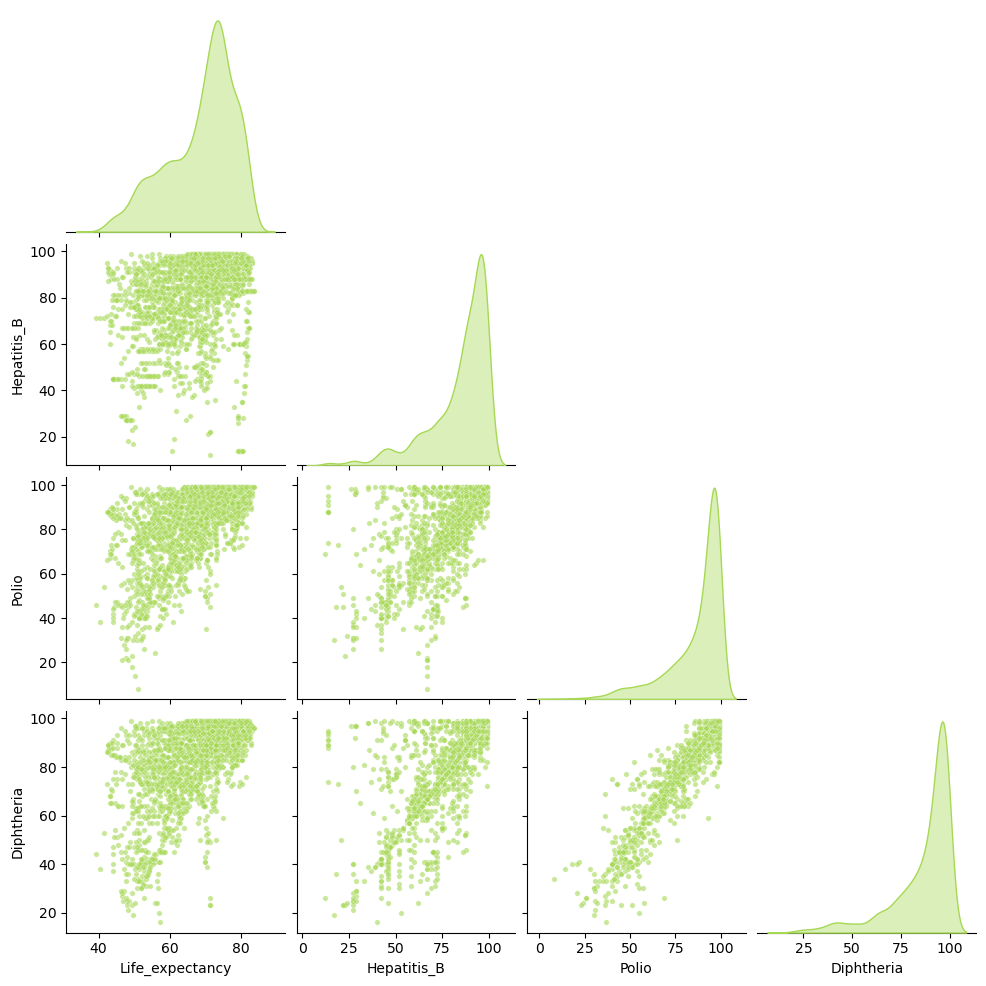

In [97]:
cols = ['Life_expectancy','Hepatitis_B','Polio', 'Diphtheria'] # select coolumns for graph
c = sns.color_palette('Set2')[4]                               # select colour scheme


sns.pairplot(
    df[cols],                                                   # data slice
    corner=True,                                                # lower triangle only
    diag_kind='kde',                                            # KDE on diagonals
    plot_kws={'alpha': 0.6, 's': 15, 'color': c},               # scatter style
    diag_kws={'fill': True, 'alpha': 0.4, 'color': c}           # KDE style
)
plt.show()

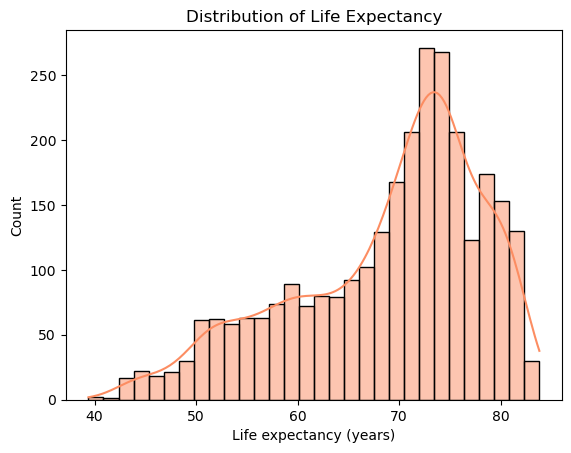

In [98]:
sns.histplot(data=df,
             x='Life_expectancy',
             bins=30,
             kde=True,
             color=sns.color_palette('Set2')[1])

plt.xlabel('Life expectancy (years)')
plt.title('Distribution of Life Expectancy')
plt.show()



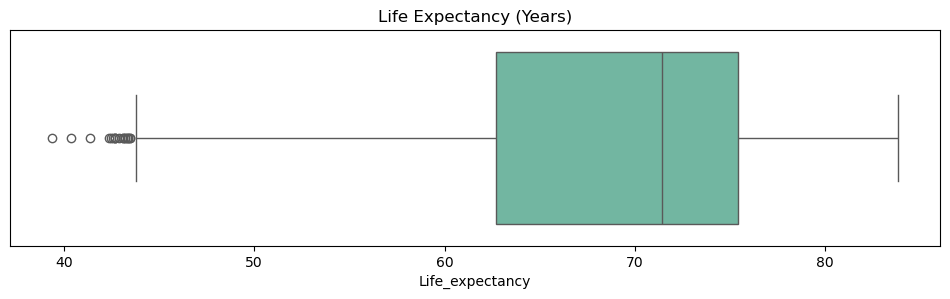

In [99]:
plt.figure(figsize=(12, 2.8))
sns.boxplot(x='Life_expectancy', data=df, color=sns.color_palette('Set2')[0])
plt.title('Life Expectancy (Years)')
plt.yticks([])
plt.show()

In [100]:
df.loc[df['Life_expectancy'] < 45, ['Country', 'Year', 'Life_expectancy']].sort_values(['Country', 'Year'])

,Country,Year,Life_expectancy
2175,Central African Republic,2000,44.2
376,Central African Republic,2001,44.1
155,Central African Republic,2002,44.1
1802,Central African Republic,2003,44.2
657,Central African Republic,2004,44.4
869,Central African Republic,2005,44.7
1236,Eswatini,2002,44.4
1686,Eswatini,2003,43.4
1139,Eswatini,2004,42.7
1275,Eswatini,2005,42.5


**Target Outliers**

A small number of observations show very low Life_expectancy (< 45 years), concentrated in the early-2000s and in a handful of countries (Central African Republic, Eswatini, Lesotho, Sierra Leone, Zambia, Zimbabwe). These values likely reflect period-specific shocks (conflict/epidemic). We retain them as valid observations and proceed without special handling.

# Looking Ahead: What This EDA Informs in Modeling

From our preliminary exploration, several patterns and relationships have emerged that will be **expanded upon in the modeling notebook**:

1. **Collinearity and Redundancy**
   - Highly correlated variables such as:
     - *Thinness_five_nine_years* & *Thinness_ten_nineteen_years*
     - *Polio*, *Diphtheria*, *Hepatitis_B*
     - *Economy_status_Developed* & *Economy_status_Developing*
   - These will guide **feature selection and engineering**, including dropping redundant variables and aggregating disease variables.

2. **Non-linear Relationships**
   - Strong logarithmic trends observed with:
     - *Life_expectancy* vs *GDP_per_capita*
     - *Life_expectancy* vs *BMI*
   - We will apply **log transformations** to improve linearity for regression models.

3. **Target Analysis**
   - Life expectancy distribution shows:
     - Left-skewness
     - Outliers (<45 years) in specific countries and years
   - These insights inform **robust scaling** and model assumptions in the next notebook.

4. **Potential Ethical Considerations**
   - Features like *Infant_deaths*, *Under_five_deaths*, *Adult_mortality*, and disease incidence variables have strong predictive power but could introduce **ethical bias**.
   - In the modeling notebook, we will show **both standard and “ethical” models** to illustrate this trade-off.

5. **Key Variables for Regression**
   - Features with highest correlation with life expectancy:
     - *Adult_mortality*, *Schooling*, *Under_five_deaths*, *Infant_deaths*, *GDP_per_capita*
   - These will guide **variable inclusion** in the regression pipeline.